## импорт библиотек

In [53]:
import pandas as pd
import numpy as np

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from sklearn.model_selection import GridSearchCV
import optuna

In [59]:

from sklearn.model_selection import cross_val_score

## импорт данных

In [62]:
train_df=pd.read_csv('train_encoded.csv', sep = ';')
test_df=pd.read_csv('test_encoded.csv', sep = ';')

In [63]:
x_train = train_df.drop('Unit_Price', axis=1)
y_train = train_df['Unit_Price']
x_test = test_df.drop('Unit_Price', axis=1)
y_test = test_df['Unit_Price']

# обучения моделей

In [105]:
# 1. Обучение модели случайного леса (регрессия)
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)  # n_estimators - кол-во деревьев
rf_model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [106]:
# 2. Обучение модели дерева решений (регрессия)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [107]:
# 3. Прогнозирование на тестовой выборке
#модель случайный лес
rf_predict = rf_model.predict(x_test)
#модель дерево решений
dt_predict = dt_model.predict(x_test)

## метрики

In [143]:
#функция для расчета всех метрик
def calculate_metrics(y_true, y_pred):
    # MAE
    mae = mean_absolute_error(y_true, y_pred)
    # WAPE
    wape = np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100
    
    return {
        'MAE': mae,
        'WAPE': wape}

In [145]:
rf_metrics=calculate_metrics(y_test, rf_predict)
dt_metrics=calculate_metrics(y_test, dt_predict)

print('случайный лес')
rf_metrics

случайный лес


{'MAE': 0.30716704649671644, 'WAPE': 6.508774658665819}

In [147]:
print('дерево решений')
dt_metrics

дерево решений


{'MAE': 0.40835521885522663, 'WAPE': 8.652920717025046}

# RandomizedSearchCV

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
# Случайный лес
param_dist_rf = {
    'n_estimators': np.arange(50, 201, 50), 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=60,  # количество случайных комбинаций
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)
random_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 50, 100, 150, 200])},
                   scoring='neg_mean_absolute_error', verbose=2)

In [179]:
print("Лучшие параметры:", random_search_rf.best_params_)
print("Лучший MAE:", -random_search_rf.best_score_)

Лучшие параметры: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Лучший MAE: 0.3638041915067919


In [180]:
# Дерево решений
param_dist_dt = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

dt = DecisionTreeRegressor(random_state=42)
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=60,  # количество случайных комбинаций
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)
random_search_dt.fit(x_train, y_train)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
105 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\User\anaconda3\Lib\site-packages\skl

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [205]:
print("Лучшие параметры:", random_search_dt.best_params_)
print("Лучший MAE:", -random_search_dt.best_score_)

Лучшие параметры: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Лучший MAE: 0.4370295977135744


In [182]:
# Случайный лес
best_rf_random= random_search_rf.best_estimator_
best_rf_random.fit(x_train, y_train)


# Дерево решений
best_dt_random = random_search_dt.best_estimator_
best_dt_random.fit(x_train, y_train)


DecisionTreeRegressor(max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [184]:
rf_predict_random = best_rf_random.predict(x_test)
dt_predict_random = best_dt_random.predict(x_test)


## метрики

In [186]:
#метрики модели
rf_metrics_random=calculate_metrics(y_test, rf_predict_random)
dt_metrics_random=calculate_metrics(y_test, dt_predict_random)

print('случайный лес')
print(rf_metrics_random)
print('')
print('дерево решений')
print(dt_metrics_random)

случайный лес
{'MAE': 0.3615484256771065, 'WAPE': 7.66109925451534}

дерево решений
{'MAE': 0.4427141524304058, 'WAPE': 9.380975886690843}


# optuna

In [199]:
def early_stopping_callback(study, trial):
    # Останавливаем, если 5 последовательных попыток не улучшают результат
    if len(study.trials) >= 5:
        last_5_trials = study.trials[-5:]
        best_in_last_5 = min(t.value for t in last_5_trials if t.value is not None)
        if best_in_last_5 >= study.best_value:
            study.stop()

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': 42,
        'n_jobs': -1  # Используем все ядра процессора
    }
    
    model = RandomForestRegressor(**params)
    return cross_val_score(model, x_train, y_train, 
                         scoring='neg_mean_absolute_error', cv=5).mean()

study_rf = optuna.create_study(direction='maximize')  # Используем maximize для neg_MSE
study_rf.optimize(objective_rf, n_trials=100, callbacks=[early_stopping_callback])

print("Лучшие параметры RandomForest:", study_rf.best_params)
print("Лучшая MАE:", -study_rf.best_value)  

[I 2025-05-13 16:14:32,059] A new study created in memory with name: no-name-7d3144d0-0d63-4c06-9b00-2f5e41c8885a
[I 2025-05-13 16:15:03,686] Trial 0 finished with value: -0.671313359615545 and parameters: {'n_estimators': 298, 'max_depth': 12, 'min_samples_split': 11, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 0 with value: -0.671313359615545.
[I 2025-05-13 16:15:30,864] Trial 1 finished with value: -0.3653532896456083 and parameters: {'n_estimators': 104, 'max_depth': 36, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: -0.3653532896456083.
[I 2025-05-13 16:15:35,365] Trial 2 finished with value: -1.146521887820267 and parameters: {'n_estimators': 79, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: -0.3653532896456083.
[I 2025-05-13 16:15:40,824] Trial 3 finished with value: -1.2767418616566668 and parameters: {'n_estimators': 116, 'max_depth': 6, 

Лучшие параметры RandomForest: {'n_estimators': 261, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
Лучшая MАE: 0.3615742082320152


In [200]:
def objective_dt(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),  # Убрали 'auto'
        'random_state': 42
    }
    
    model = DecisionTreeRegressor(**params)
    return cross_val_score(model, x_train, y_train,
                         scoring='neg_mean_absolute_error', cv=5).mean()

study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective_dt, n_trials=100, callbacks=[early_stopping_callback])

print("Лучшие параметры DecisionTree:", study_dt.best_params)
print("Лучшая MАE:", -study_dt.best_value)

[I 2025-05-13 20:43:12,446] A new study created in memory with name: no-name-2ca6096d-8b2e-491a-be7a-342e6ce6ef6d
[I 2025-05-13 20:43:13,231] Trial 0 finished with value: -1.0451054785285183 and parameters: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: -1.0451054785285183.
[I 2025-05-13 20:43:14,205] Trial 1 finished with value: -1.2451449969619959 and parameters: {'max_depth': 13, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: -1.0451054785285183.
[I 2025-05-13 20:43:15,744] Trial 2 finished with value: -0.6684472820425499 and parameters: {'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 2 with value: -0.6684472820425499.
[I 2025-05-13 20:43:16,562] Trial 3 finished with value: -1.0015040639562003 and parameters: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best i

Лучшие параметры DecisionTree: {'max_depth': 29, 'min_samples_split': 19, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Лучшая MАE: 0.4335178461071062


In [201]:
# обучение модели с лучшими параметрами

best_rf_optuna = RandomForestRegressor(**study_rf.best_params, random_state=42)
best_rf_optuna.fit(x_train, y_train)

#предсказания на тест выборке
rf_predict_optuna = best_rf_optuna.predict(x_test)

In [261]:
best_rf_optuna.fit(x_train, y_train)

RandomForestRegressor(max_depth=45, max_features='sqrt', n_estimators=261,
                      random_state=42)

In [202]:
# обучение модели с лучшими параметрами

best_dt_optuna = DecisionTreeRegressor(**study_dt.best_params, random_state=42)
best_dt_optuna.fit(x_train, y_train)

#предсказания на тест выборке
dt_predict_optuna = best_dt_optuna.predict(x_test)

In [262]:
best_dt_optuna.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=29, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=19, random_state=42)

## метрики

In [204]:
#метрики модели
rf_metrics_optuna=calculate_metrics(y_test, rf_predict_optuna)
dt_metrics_optuna=calculate_metrics(y_test, dt_predict_optuna)

print('случайный лес')
print(rf_metrics_optuna)
print('')
print('дерево решений')
print(dt_metrics_optuna)

случайный лес
{'MAE': 0.35839541351665777, 'WAPE': 7.59428790257361}

дерево решений
{'MAE': 0.43715007258127314, 'WAPE': 9.263074756560288}


# сравнение метрик

In [212]:
all_metrics = {}
all_metrics['DecisionTree (Base)'] = dt_metrics
all_metrics['DecisionTree (GridSearch)'] = dt_metrics_random
all_metrics['DecisionTree (Optuna)'] = dt_metrics_optuna

In [236]:
# Словарь для хранения результатов всех моделей
all_metrics = {}


#  RandomForest
all_metrics['RandomForest (Base)'] = rf_metrics
#  DecisionTree
all_metrics['DecisionTree (Base)'] = dt_metrics


#  RandomForest (GridSearch)

all_metrics['RandomForest (GridSearch)'] = rf_metrics_random

#  DecisionTree (GridSearch)

all_metrics['DecisionTree (GridSearch)'] = dt_metrics_random

#  RandomForest (Optuna)

all_metrics['RandomForest (Optuna)'] = rf_metrics_optuna

#  DecisionTree (Optuna)

all_metrics['DecisionTree (Optuna)'] = dt_metrics_optuna

In [238]:

# Преобразуем словарь в DataFrame
metrics_df = pd.DataFrame.from_dict(all_metrics, orient='index')

# Устанавливаем опции форматирования для отображения DataFrame
pd.options.display.float_format = '{:.2f}'.format

metrics_df


,MAE,WAPE
RandomForest (Base),0.31,6.51
DecisionTree (Base),0.41,8.65
RandomForest (GridSearch),0.36,7.66
DecisionTree (GridSearch),0.44,9.38
RandomForest (Optuna),0.36,7.59
DecisionTree (Optuna),0.44,9.26


## сравнение результатов

In [220]:

# дс с предсказаниями
results_comparison = pd.DataFrame({
    'Истинное значение': y_test,
    'Случайный лес': rf_predict,
    'Случайный лес Grid Search' : rf_predict_random,
    'Случайный лес Optuna' : rf_predict_optuna, 
    'Дерево решений': dt_predict,
    'Дерево решений Grid Search' : dt_predict_random,
    'Дерево решений Optuna' : dt_predict_optuna
    
}).round(2)



results_comparison['Ошибка Случайный лес'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Случайный лес']), 2)
results_comparison['Ошибка Случайный лес Grid Search'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Случайный лес Grid Search']), 2)
results_comparison['Ошибка Дерево решений'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Дерево решений']), 2)

results_comparison['Ошибка Случайный лес Optuna'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Случайный лес Optuna']), 2)
results_comparison['Ошибка Дерево решений Grid Search'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Дерево решений Grid Search']), 2)
results_comparison['Ошибка Дерево решений Optuna'] = round(abs(results_comparison['Истинное значение'] - results_comparison['Дерево решений Optuna']), 2)

In [255]:
# дс с предсказаниями
results_comparison = pd.DataFrame({
    'Истинное значение': y_test,
    'Случайный лес': rf_predict,
    'Случайный лес Grid Search' : rf_predict_random,
    'Случайный лес Optuna' : rf_predict_optuna, 
    'Дерево решений': dt_predict,
    'Дерево решений Grid Search' : dt_predict_random,
    'Дерево решений Optuna' : dt_predict_optuna
    
}).round(2)

In [257]:
results_comparison

,Истинное значение,Случайный лес,Случайный лес Grid Search,Случайный лес Optuna,Дерево решений,Дерево решений Grid Search,Дерево решений Optuna
0,7.50,7.45,7.77,7.70,7.60,7.83,7.99
1,5.40,5.46,5.44,5.45,5.60,5.23,5.47
2,3.10,3.03,2.95,2.90,2.50,2.83,2.79
3,5.10,4.51,4.58,4.55,4.80,4.27,4.65
4,8.10,7.93,7.79,7.91,8.50,7.49,8.29
...,...,...,...,...,...,...,...
29695,7.30,6.63,6.63,6.59,6.60,6.63,6.60
29696,2.40,2.99,2.98,3.00,3.20,2.99,2.48
29697,4.40,4.39,4.81,4.80,4.40,5.05,4.64
29698,10.20,7.24,9.56,9.57,6.80,9.00,9.62


In [259]:
results_comparison.to_csv('rf_dt_results.csv', sep = ';', index=True)

In [222]:
results_comparison.sample(20)

,Истинное значение,Случайный лес,Случайный лес Grid Search,Случайный лес Optuna,Дерево решений,Дерево решений Grid Search,Дерево решений Optuna,Ошибка Случайный лес,Ошибка Случайный лес Grid Search,Ошибка Дерево решений,Ошибка Случайный лес Optuna,Ошибка Дерево решений Grid Search,Ошибка Дерево решений Optuna
29129,7.0,7.20,7.12,7.01,7.2,7.01,7.29,0.20,0.12,0.2,0.01,0.01,0.29
2336,6.9,6.80,6.85,6.80,6.8,6.80,6.80,0.10,0.05,0.1,0.10,0.10,0.10
15573,7.0,6.97,7.15,7.13,7.1,7.00,8.17,0.03,0.15,0.1,0.13,0.00,1.17
4964,1.5,1.44,1.45,1.48,1.7,1.37,1.50,0.06,0.05,0.2,0.02,0.13,0.00
7097,6.7,6.69,6.27,6.31,6.7,5.96,6.03,0.01,0.43,0.0,0.39,0.74,0.67
26115,5.4,5.39,6.03,5.97,5.4,6.80,6.32,0.01,0.63,0.0,0.57,1.40,0.92
20590,4.3,4.67,4.66,4.64,3.8,4.53,4.86,0.37,0.36,0.5,0.34,0.23,0.56
20183,1.6,1.60,1.64,1.67,1.3,1.69,1.63,0.00,0.04,0.3,0.07,0.09,0.03
6445,7.7,7.57,7.32,7.25,7.6,7.26,7.26,0.13,0.38,0.1,0.45,0.44,0.44
6001,2.1,2.59,2.53,2.56,2.5,2.55,2.49,0.49,0.43,0.4,0.46,0.45,0.39


In [103]:
test_df['Unit_Price'].describe()

count    29700.000000
mean         4.719276
std          2.766171
min          0.200000
25%          2.400000
50%          4.200000
75%          6.900000
max         13.600000
Name: Unit_Price, dtype: float64

# выводы

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

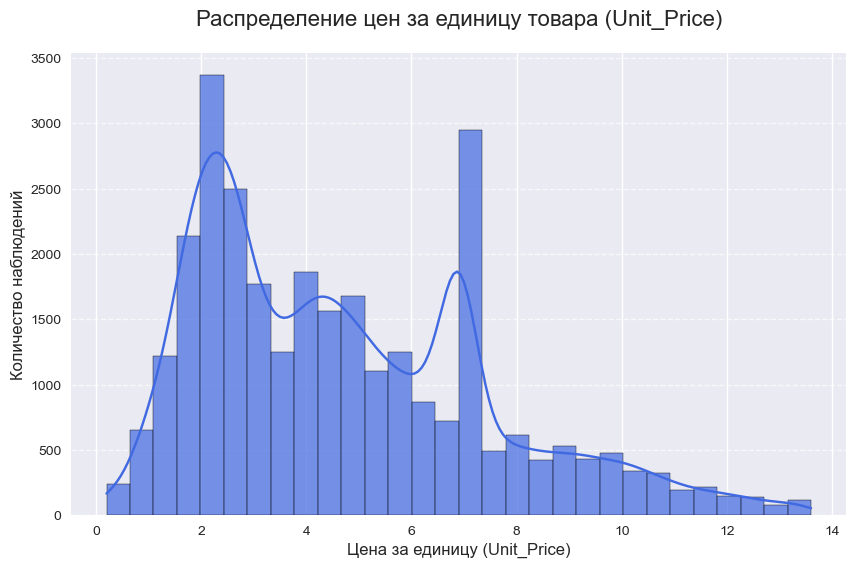

In [253]:


# Установка стиля (например, 'seaborn-v0_8' или 'ggplot')
plt.style.use('seaborn-v0_8')  # Современный стиль seaborn (для matplotlib >= 3.6)
# Или альтернативные стили: 'ggplot', 'fivethirtyeight', 'dark_background'
plt.figure(figsize=(10, 6))  # Размер графика

# Построение гистограммы
sns.histplot(
    test_df['Unit_Price'],
    bins=30,  # Количество столбцов
    kde=True,  # Добавить ядерную оценку плотности (KDE)
    color='royalblue',
    edgecolor='black',
    alpha=0.7,
)

# Добавление заголовка и подписей
plt.title('Распределение цен за единицу товара (Unit_Price)', fontsize=16, pad=20)
plt.xlabel('Цена за единицу (Unit_Price)', fontsize=12)
plt.ylabel('Количество наблюдений', fontsize=12)

# Добавление сетки для улучшения читаемости
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Вывод графика
plt.show()